In [92]:
import gymnasium as gym
import highway_env
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecMonitor
import logging

# Enable more verbose logging
logging.basicConfig(level=logging.INFO)

# Create the environment
env = gym.make("highway-v1")

# Configure with explicit continuous action space parameters
env.unwrapped.configure({
    "action": {
        "type": "ContinuousAction",
        "acceleration_range": [-5.0, 5.0],  # Set explicit acceleration range
        "steering_range": [-np.pi/4, np.pi/4],  # Set explicit steering range
    },
    # Simplify the environment for easier learning
    "vehicles_count": 50,
    "duration": 40,
    "simulation_frequency": 15,
    "policy_frequency": 1,
})

# Reset to apply configuration
obs = env.reset()

print(f"Action space: {env.action_space}")
print(f"Action space shape: {env.action_space.shape}")
print(f"Action space sample: {env.action_space.sample()}")

Action space: Box(-1.0, 1.0, (2,), float32)
Action space shape: (2,)
Action space sample: [-0.4026297 -0.6026099]


In [93]:
# # Vectorize the environment
# env = DummyVecEnv([lambda: env])
# env = VecMonitor(env)

# Configure PPO for continuous action spaces
model = PPO(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    n_steps=2048,  # Increase steps per update
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.0,  # Reduce entropy for more stable learning
    verbose=1,
    tensorboard_log="./ppo_highway_tensorboard/"
)

# # Try a very small number of steps first to catch early errors
# try:
#     print("Starting learning...")
#     model.learn(total_timesteps=100, log_interval=1)
#     print("First 100 steps completed, continuing...")
    
#     # If that works, continue with more steps
#     model.learn(total_timesteps=10000, log_interval=10, tb_log_name="PPO_highway")
#     print("Training completed successfully!")
    
#     # Save the model
#     model.save("ppo_highway_continuous")
# except Exception as e:
#     print(f"Error during training: {e}")
#     import traceback
#     traceback.print_exc()
model.learn(total_timesteps=2000,tb_log_name = 'PPO_1')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./ppo_highway_tensorboard/PPO_1_10
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.5      |
|    ep_rew_mean     | 0.11     |
| time/              |          |
|    fps             | 3        |
|    iterations      | 1        |
|    time_elapsed    | 534      |
|    total_timesteps | 2048     |
---------------------------------


In [80]:
model.set_env(env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [95]:
model.learn(total_timesteps=1000,tb_log_name = 'PPO_1', reset_num_timesteps=False)

Logging to ./ppo_highway_tensorboard/PPO_1_10
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.49     |
|    ep_rew_mean     | 0.136    |
| time/              |          |
|    fps             | 4        |
|    iterations      | 1        |
|    time_elapsed    | 497      |
|    total_timesteps | 6144     |
---------------------------------


In [82]:
model.learn(total_timesteps=5000,tb_log_name = 'PPO_1', reset_num_timesteps=False)

Logging to ./ppo_highway_tensorboard/PPO_1_8
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 139      |
|    ep_rew_mean     | 101      |
| time/              |          |
|    fps             | 12       |
|    iterations      | 1        |
|    time_elapsed    | 161      |
|    total_timesteps | 38964    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 143         |
|    ep_rew_mean          | 107         |
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 2           |
|    time_elapsed         | 321         |
|    total_timesteps      | 41012       |
| train/                  |             |
|    approx_kl            | 0.007371155 |
|    clip_fraction        | 0.0631      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.23       |
|    explained_variance   |

In [83]:
model.learn(total_timesteps=5000,tb_log_name = 'PPO_1', reset_num_timesteps=False)

Logging to ./ppo_highway_tensorboard/PPO_1_8
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 155      |
|    ep_rew_mean     | 119      |
| time/              |          |
|    fps             | 12       |
|    iterations      | 1        |
|    time_elapsed    | 161      |
|    total_timesteps | 45108    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 163         |
|    ep_rew_mean          | 127         |
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 2           |
|    time_elapsed         | 322         |
|    total_timesteps      | 47156       |
| train/                  |             |
|    approx_kl            | 0.009458161 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.14       |
|    explained_variance   |

In [84]:
model.learn(total_timesteps=5000,tb_log_name = 'PPO_1', reset_num_timesteps=False)

Logging to ./ppo_highway_tensorboard/PPO_1_8
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 184      |
|    ep_rew_mean     | 144      |
| time/              |          |
|    fps             | 12       |
|    iterations      | 1        |
|    time_elapsed    | 160      |
|    total_timesteps | 51252    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 193         |
|    ep_rew_mean          | 153         |
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 2           |
|    time_elapsed         | 322         |
|    total_timesteps      | 53300       |
| train/                  |             |
|    approx_kl            | 0.012153389 |
|    clip_fraction        | 0.126       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.01       |
|    explained_variance   |

In [85]:
model.learn(total_timesteps=5000,tb_log_name = 'PPO_1', reset_num_timesteps=False)

Logging to ./ppo_highway_tensorboard/PPO_1_8
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 198      |
|    ep_rew_mean     | 160      |
| time/              |          |
|    fps             | 12       |
|    iterations      | 1        |
|    time_elapsed    | 158      |
|    total_timesteps | 57396    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 198         |
|    ep_rew_mean          | 161         |
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 2           |
|    time_elapsed         | 321         |
|    total_timesteps      | 59444       |
| train/                  |             |
|    approx_kl            | 0.018581659 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.89       |
|    explained_variance   |

In [87]:
model.learn(total_timesteps=5000,tb_log_name = 'PPO_1', reset_num_timesteps=False)

Logging to ./ppo_highway_tensorboard/PPO_1_8
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 189      |
|    ep_rew_mean     | 158      |
| time/              |          |
|    fps             | 12       |
|    iterations      | 1        |
|    time_elapsed    | 157      |
|    total_timesteps | 69684    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 189         |
|    ep_rew_mean          | 159         |
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 2           |
|    time_elapsed         | 322         |
|    total_timesteps      | 71732       |
| train/                  |             |
|    approx_kl            | 0.009612122 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   |

KeyboardInterrupt: 

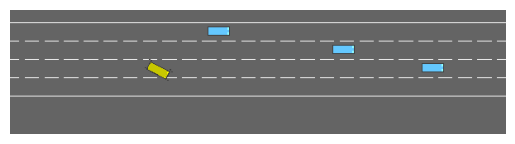

In [89]:
import gymnasium as gym
import matplotlib.pyplot as plt
import highway_env
from IPython.display import clear_output, display

# Reset the environment
obs, info = env.reset()
done = False

# Run the simulation loop
while not done:
    # Sample a random action
    #action = env.action_space.sample()
    action, _ = model.predict(obs, deterministic=False)

    # Take a step in the environment
    obs, reward, done, truncated, info = env.step(action)

    # Render the environment as an image
    frame = env.render()

    # Display the rendered frame
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)  # Clear the previous frame
    display(plt.gcf())       # Display the current frame

    # Check if the episode is done
    done = truncated


# Close the environment
env.close()

In [ ]:
# Create the SAC model
model = PPO(
    "MlpPolicy",
    env,
    learning_rate=0.0003,
    policy_kwargs=dict(net_arch=[dict(pi=[256, 256], vf=[256, 256])]),
    batch_size=64,
    gamma=0.9,
    clip_range=0.2,
    ent_coef=0.00,
    verbose=1,
    tensorboard_log="ppo_highway_tensorboard"
)

# Train the model``
model.learn(total_timesteps=2000,tb_log_name = 'PPO_3')

Using cpu device
Logging to ./ppo_highway_tensorboard/PPO_1_6
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.48     |
|    ep_rew_mean     | 0.0981   |
| time/              |          |
|    fps             | 4        |
|    iterations      | 1        |
|    time_elapsed    | 511      |
|    total_timesteps | 2048     |
---------------------------------


In [ ]:
model.save("PPO_highwayv1")

In [2]:
model = PPO.load("PPO_highwayv1")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of test episodes
n_episodes = 50

# Exponential delay parameters
scale = 1.2  # Mean delay
max_delay = 2  # Maximum delay in seconds

# Tracking performance metrics for both tests
cumulative_rewards_no_delay = []
cumulative_rewards_with_delay = []
episode_lengths_no_delay = []
episode_lengths_with_delay = []
crashes_no_delay = 0
crashes_with_delay = 0

# Run testing without delay
for episode in range(n_episodes):
    obs, info = env.reset()
    total_reward = 0
    done = False
    episode_length = 0
    episode_crash = False  # Track crash per episode

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        episode_length += 1
        done = terminated or truncated

        # Check if a crash occurred
        if info.get("crashed", False):
            episode_crash = True

    cumulative_rewards_no_delay.append(total_reward)
    episode_lengths_no_delay.append(episode_length)
    crashes_no_delay += int(episode_crash)

    print(f"Episode {episode + 1} (No Delay): Total Reward = {total_reward:.2f}, Length = {episode_length} timesteps, Crash: {episode_crash}")

# Run testing with delay
for episode in range(n_episodes):
    obs, info = env.reset()
    total_reward = 0
    done = False
    episode_length = 0
    episode_crash = False

    # Generate a random delay from an exponential distribution, capped at max_delay
    random_delay = min(np.random.exponential(scale), max_delay)

    while not done:
        action, _ = model.predict(obs, deterministic=True)

        # Apply the computation delay before executing the action
        env.unwrapped.elapse(random_delay)

        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        episode_length += 1
        done = terminated or truncated

        # Check if a crash occurred
        if info.get("crashed", False):
            episode_crash = True

    cumulative_rewards_with_delay.append(total_reward)
    episode_lengths_with_delay.append(episode_length)
    crashes_with_delay += int(episode_crash)

    print(f"Episode {episode + 1} (With Delay): Delay = {random_delay:.2f}s, Total Reward = {total_reward:.2f}, Length = {episode_length} timesteps, Crash: {episode_crash}")

env.close()

# Compute statistics
mean_reward_no_delay = sum(cumulative_rewards_no_delay) / n_episodes
mean_reward_with_delay = sum(cumulative_rewards_with_delay) / n_episodes
mean_episode_length_no_delay = sum(episode_lengths_no_delay) / n_episodes
mean_episode_length_with_delay = sum(episode_lengths_with_delay) / n_episodes
crash_rate_no_delay = crashes_no_delay / n_episodes
crash_rate_with_delay = crashes_with_delay / n_episodes

print(f"\nWithout Delay - Mean Reward: {mean_reward_no_delay:.2f}, Mean Episode Length: {mean_episode_length_no_delay:.2f}, Crash Rate: {crash_rate_no_delay:.2%}")
print(f"With Delay - Mean Reward: {mean_reward_with_delay:.2f}, Mean Episode Length: {mean_episode_length_with_delay:.2f}, Crash Rate: {crash_rate_with_delay:.2%}")

# Plot the results
episodes = range(1, n_episodes + 1)

plt.figure(figsize=(14, 6))

# Cumulative Reward Comparison
plt.subplot(1, 2, 1)
plt.plot(episodes, cumulative_rewards_no_delay, marker='o', label="No Delay", color='#103463')
plt.plot(episodes, cumulative_rewards_with_delay, marker='x', label="With Delay", color='#f3b6b3')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Comparison")
plt.legend()
plt.grid(True)

# Episode Length Comparison
plt.subplot(1, 2, 2)
plt.plot(episodes, episode_lengths_no_delay, marker='o', label="No Delay", color='#103463')
plt.plot(episodes, episode_lengths_with_delay, marker='x', label="With Delay", color='#f3b6b3')
plt.xlabel("Episode")
plt.ylabel("Episode Length")
plt.title("Episode Length Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define metrics
metrics_main = ["Mean Reward", "Mean Episode Length"]
before_delay_main = [mean_reward_no_delay, mean_episode_length_no_delay]  # Mean Reward, Episode Length (before delay)
after_delay_main = [mean_reward_with_delay, mean_episode_length_with_delay]  # Mean Reward, Episode Length (after delay)

metrics_crash = ["Crash Rate"]
before_delay_crash = [crash_rate_no_delay]  # Crash Rate (before delay)
after_delay_crash = [crash_rate_with_delay]  # Crash Rate (after delay)

# Set Seaborn style
sns.set_style("whitegrid")

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- First Chart: Mean Reward & Episode Length ---
x = np.arange(len(metrics_main))  # Label positions
width = 0.35  # Bar width

bars1 = axes[0].bar(x - width/2, before_delay_main, width, label="Before Delay", color="#103463")
bars2 = axes[0].bar(x + width/2, after_delay_main, width, label="After Delay", color="#f3b6b3")

# Labels & Title
axes[0].set_title("PPO Mean Reward & Episode Length", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Values", fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_main)
axes[0].legend()

# Show value labels on bars
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1, axes[0])
add_labels(bars2, axes[0])

# --- Second Chart: Crash Rate ---
x_crash = np.arange(len(metrics_crash))  # Label positions
crash_width = 0.3  # Narrower bar width for crash rate

bars3 = axes[1].bar(x_crash - crash_width, before_delay_crash, crash_width, label="Before Delay", color="#103463")
bars4 = axes[1].bar(x_crash + crash_width, after_delay_crash, crash_width, label="After Delay", color="#f3b6b3")

# Labels & Title
axes[1].set_title("PPO Crash Rate", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Values (%)", fontsize=12)
axes[1].set_xticks(x_crash)
axes[1].set_xticklabels(metrics_crash)
axes[1].legend()

# Show value labels on bars
add_labels(bars3, axes[1])
add_labels(bars4, axes[1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def evaluate_with_exponential_computation_costs(scale, max_delay, n_eval_episodes=50):
    results = []

    for episode in range(n_eval_episodes):

        # Generate a random delay using exponential distribution, capped at max_delay (2s)
        random_delay = min(np.random.exponential(scale), max_delay)

        obs, info = env.reset()

        # Run one episode
        total_reward = 0
        episode_length = 0
        done = False

        while not done:
            action, _ = model.predict(obs, deterministic=True)
            env.unwrapped.elapse(random_delay, reset_steering=True)
            obs, reward, terminated, truncated, info = env.step(action)
            total_reward += reward
            episode_length += 1
            done = terminated or truncated

        # Store results
        results.append({
            'episode': episode + 1,
            'computation_delay': random_delay,
            'total_reward': total_reward,
            'episode_length': episode_length
        })

        # Print episode results
        print(f"Episode {episode + 1}: Delay = {random_delay:.2f}s, "
              f"Total Reward = {total_reward:.2f}, Length = {episode_length} timesteps")

        # Close the environment
        env.close()

    return results


# Set parameters for exponential sampling
scale = 1.2  # Mean delay (adjustable)
max_delay = 2  # Maximum delay capped at 2 seconds

# Path to the pre-trained model

# Run the evaluations
results = evaluate_with_exponential_computation_costs(scale, max_delay, n_eval_episodes=50)

# Compute mean values
mean_reward = np.mean([r['total_reward'] for r in results])
mean_length = np.mean([r['episode_length'] for r in results])

print(f"\nMean Total Reward: {mean_reward:.2f}")
print(f"Mean Episode Length: {mean_length:.2f} timesteps")

In [ ]:

def plot_results_pretty(results):
    # Sort results by computation delay
    results = sorted(results, key=lambda x: x['computation_delay'])

    delays = [r['computation_delay'] for r in results]
    rewards = [r['total_reward'] for r in results]
    lengths = [r['episode_length'] for r in results]

    # Set style
    plt.style.use("tableau-colorblind10")  # Prettier theme

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Color settings
    reward_color = "#103463"   # Coral red
    length_color = "#9b5372"   # Teal green

    # Plot Total Reward vs Delay
    axes[0].plot(delays, rewards, marker='o', markersize=8, linestyle='-', linewidth=2.5, color=reward_color, label='Total Reward')
    axes[0].fill_between(delays, rewards, color=reward_color, alpha=0.15)  # Light shading for effect
    axes[0].set_xlabel('Computation Delay (s)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Total Reward', fontsize=12, fontweight='bold')
    axes[0].set_title('Total Reward vs Computation Delay', fontsize=14, fontweight='bold')
    axes[0].grid(True, linestyle='--', alpha=0.6)
    axes[0].legend(fontsize=12)

    # Plot Episode Length vs Delay
    axes[1].plot(delays, lengths, marker='s', markersize=8, linestyle='-', linewidth=2.5, color=length_color, label='Episode Length')
    axes[1].fill_between(delays, lengths, color=length_color, alpha=0.15)
    axes[1].set_xlabel('Computation Delay (s)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Episode Length (timesteps)', fontsize=12, fontweight='bold')
    axes[1].set_title('Episode Length vs Computation Delay', fontsize=14, fontweight='bold')
    axes[1].grid(True, linestyle='--', alpha=0.6)
    axes[1].legend(fontsize=12)

    plt.tight_layout()
    plt.show()

plot_results_pretty(results)